In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's create a classsification datset
from sklearn.datasets import make_circles

# Set samples to 1000
n_samples = 1000

# Features and Labels
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [3]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64))

In [4]:
len(X)

1000

In [5]:
# Let's divide our dataset into training and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [6]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), # Hidden layer 1, 4 neurons with ReLU activation function
    tf.keras.layers.Dense(4, activation="relu"), # Hidden layer 2, 4 neurons with ReLU activation function
    tf.keras.layers.Dense(1, activation="sigmoid") # Output layer, 1 neuron with sigmoid activation function
])

# 2. Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 781us/step - loss: 0.6971 - accuracy: 0.4850 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 834us/step - loss: 0.6966 - accuracy: 0.4888 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 792us/step - loss: 0.6960 - accuracy: 0.4900 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 708us/step - loss: 0.6954 - accuracy: 0.4850 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 690us/step - loss: 0.6949 - accuracy: 0.4863 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 708us/step - loss: 0.6942 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 708us/step - loss: 0.6937 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 750us/step - loss: 0.6931 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 

<Axes: xlabel='epochs'>

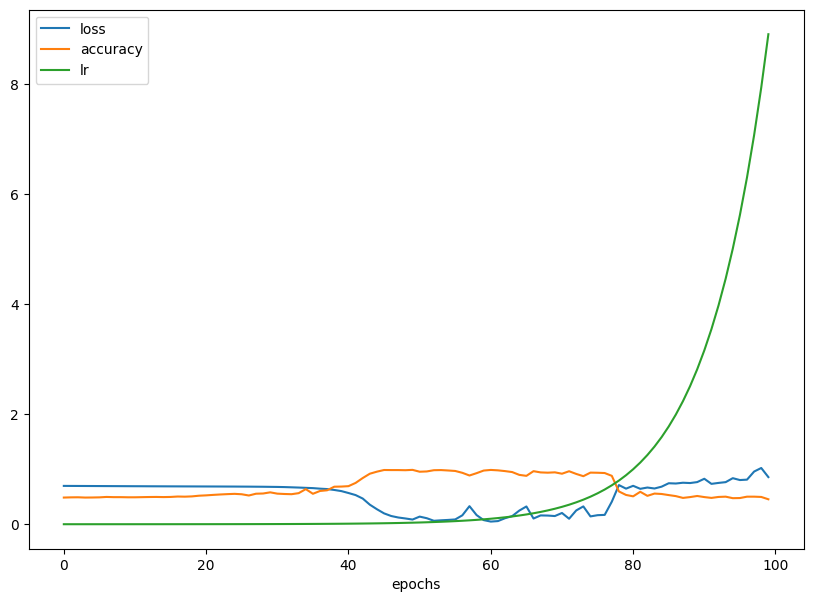

In [7]:
# Checkout the hsitory
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs loss')

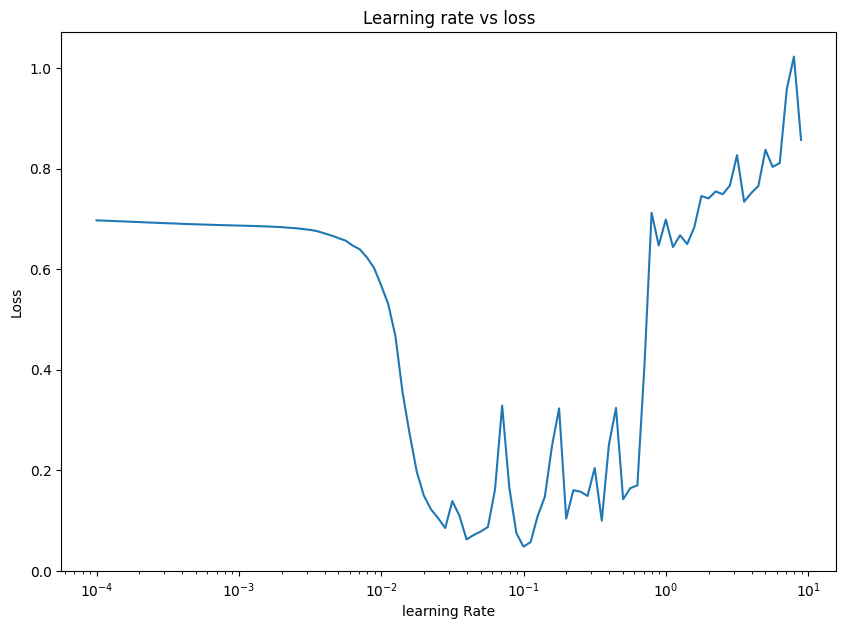

In [8]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10**(np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

The ideal learning rate at the start of model training is somewhere just befor the loss curve bottoms out (a value where the loss is still decreasing).

In [9]:
# Exmaple of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Now we have estimated the ideal learning rate (we will use 0.02) for our model, let's refit it.

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # In order to adjust the learning_rate you need to use tf.keras.optimizers.Adam()
                metrics=['accuracy'])

# 3. Fit the model
history = model_1.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 863us/step - loss: 0.6936 - accuracy: 0.4925
Epoch 2/20
25/25 [==============================] - 0s 750us/step - loss: 0.6845 - accuracy: 0.5337
Epoch 3/20
25/25 [==============================] - 0s 717us/step - loss: 0.6780 - accuracy: 0.5537
Epoch 4/20
25/25 [==============================] - 0s 719us/step - loss: 0.6630 - accuracy: 0.6200
Epoch 5/20
25/25 [==============================] - 0s 740us/step - loss: 0.6487 - accuracy: 0.6075
Epoch 6/20
25/25 [==============================] - 0s 729us/step - loss: 0.6264 - accuracy: 0.6375
Epoch 7/20
25/25 [==============================] - 0s 733us/step - loss: 0.5828 - accuracy: 0.7225
Epoch 8/20
25/25 [==============================] - 0s 634us/step - loss: 0.5082 - accuracy: 0.7775
Epoch 9/20
25/25 [==============================] - 0s 784us/step - loss: 0.3964 - accuracy: 0.8712
Epoch 10/20
25/25 [==============================] - 0s 842us/step - loss: 0.2569 - accuracy: 0.9762

Nice! with a little higher learning rat (0.02 instead of 0.01) we reach a higher accuracy than previous models in less epochs.

In [12]:
# Evaluate model on the test dataset
model_1.evaluate(X_test, y_test)

7/7 [==============================] - 0s 708us/step - loss: 0.0515 - accuracy: 0.9850


[0.05150140821933746, 0.9850000143051147]

Let's see how the predictions look

In [13]:
# Create a plotting function
def plot_decision_boundary(model, X, y):
    
    """
    Plots the decision boundary created by a model predicting on X.
    """
    
    # Define axis boundaries and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we are going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together
    
    # Make predictions using the trained model
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if model.output_shape[-1]  > 1: # Checks the final dimensions of the model's output shape
        print("We are doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
        
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 469us/step
Doing binary classification...
313/313 [==============================] - 0s 483us/step
Doing binary classification...


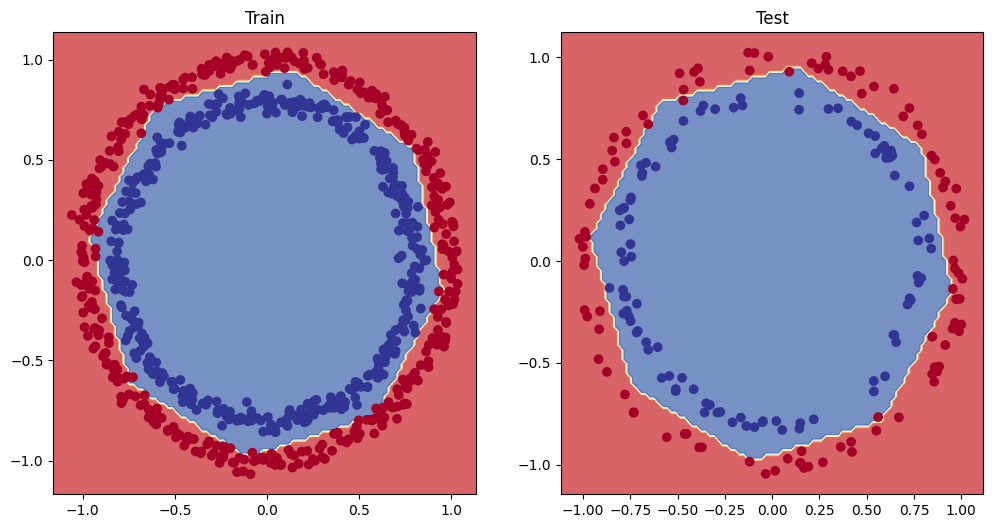

In [15]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_1, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model = model_1, X=X_test, y=y_test)
plt.show()